### Objective:

To classify Happy or Sad Emotions in Musical Audio Files using deep learning. Essentially, it a binary classification problem.

### Problem Statement

To build and implement a deep learning model to classify Happy or Sad Emotions in Musical Audio Files dataset.

At the end of this competition, you will be able to:

Load and extract features of wave files available in the Musical Audio Files dataset using librosa.feature.mfcc

Build a deep learning model using either Keras or PyTorch deep learning libraries.

### Description:

Dataset Description: The original dataset contains 7 classes but this is just a subset of the original dataset which contains 2 classes. The audio files in the dataset were already preprocessed by converting them into smaller chunks of equal size. All music were divided into 10 seconds smaller chunks using FFMPEG.

The chunks of the same song have the equally spaced names like : Happy20001-Happy20016(Same song) The last two digits resembles the chunk number while the first three digits are the ID of the original song which is provided as the GroupID. The two classes are: 1.)Happy and 2.)Sad


## Grading = 10 Marks

Here is a handy link to Kaggle's competition documentation (https://www.kaggle.com/docs/competitions), which includes, among other things, instructions on submitting predictions (https://www.kaggle.com/docs/competitions#making-a-submission).

### Instructions for downloading train and test data are as follows:

### 1. Create an API key in Kaggle.

To do this, go to the competition site on Kaggle at (https://www.kaggle.com/t/89d3f0ee9e534c5ab16f40316ff15d0b) and click on user then click on your profile as shown below. Click Account.

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP.PNG)

### 2. Next, scroll down to the API access section and click on **Create New Token** to download an API key (kaggle.json).

![alt text](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Capture-NLP_1.PNG)

### 3. Upload your kaggle.json file using the following snippet in a code cell:



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kshitijdesai","key":"083b272cfa48c824c0632a2de12465a4"}'}

In [2]:
#If successfully uploaded in the above step, the 'ls' command here should display the kaggle.json file.
%ls

 classification-of-musical-emotions-of-audio-files.zip   sample_submission.csv
'kaggle (1).json'                                        submission.csv
 kaggle.json                                             Test/
 sample_data/                                            Train/


### 4. Install the Kaggle API using the following command


In [3]:
!pip install -U -q kaggle==1.5.8

### 5. Move the kaggle.json file into ~/.kaggle, which is where the API client expects your token to be located:



In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#Execute the following command to verify whether the kaggle.json is stored in the appropriate location: ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!chmod 600 /root/.kaggle/kaggle.json #run this command to ensure your Kaggle API token is secure on colab

### 6. Now download the Test Data from Kaggle

**NOTE: If you get a '403 - Not Found' error after running the cell below, it is most likely that the user (whose kaggle.json is uploaded above) has not 'accepted' the rules of the competition and therefore has 'not joined' the competition.**

If you encounter **401-unauthorised** download latest **kaggle.json** by repeating steps 1 & 2

In [7]:
#If you get a forbidden link, you have most likely not joined the competition.
!kaggle competitions download -c classification-of-musical-emotions-of-audio-files
!unzip classification-of-musical-emotions-of-audio-files

classification-of-musical-emotions-of-audio-files.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  classification-of-musical-emotions-of-audio-files.zip
replace Test/Test/1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### YOUR CODING STARTS FROM HERE

### Import Neccesary Packages

In [8]:
# YOUR CODE HERE
import torch
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import librosa
from pathlib import Path
import torch.nn.functional as F
import os,random
import seaborn as sns
import torch.optim as optim
import torchaudio
import IPython.display as ipd

### **Stage 1:** Load the Train data audio files (1 point)




In [9]:
# YOUR CODE HERE
train_path = '/content/Train/Train/'
train_labels = os.listdir(train_path)
train_labels

['Happy', 'Sad']

In [10]:
test_path = '/content/Test/'
test_labels = os.listdir(test_path)
test_labels

['Test']

In [11]:
train_dict = {}
test_dict = {}

In [12]:
for i in train_labels:
    train_dict[i] = os.listdir(train_path + i)

In [13]:
for i in test_labels:
    test_dict[i] = os.listdir(test_path + i)

In [14]:
train_paths1 = []
train_labels1 = []
test_paths1 = []
test_labels1 = []

In [15]:
for class_label, paths in train_dict.items():
    for sound_paths in paths:
        train_paths1.append(train_path + class_label.capitalize()+'/'+sound_paths)
        train_labels1.append(class_label)

In [16]:
len(train_labels1)

1873

In [17]:
for class_label, paths in test_dict.items():
    for sound_paths in paths:
        test_paths1.append(test_path + class_label.capitalize()+'/'+sound_paths)
        test_labels1.append(1)

In [18]:
len(test_labels1)

253

In [20]:
SAMPLE_RATE = 22050

#### Play the sample audio

#### Sad

In [21]:
# YOUR CODE HERE
sad_audio, sample_rate  =  librosa.load("/content/Train/Train/Sad/Sad38804.wav", duration=5, offset=0.5, sr=SAMPLE_RATE)
ipd.Audio(sad_audio, rate=sample_rate)

In [22]:
sad_audio.shape, sample_rate

((110250,), 22050)

In [23]:
sad_signal = np.zeros((int(SAMPLE_RATE*5)))
sad_signal.shape

(110250,)

In [24]:
sad_signal[:len(sad_audio)] = sad_audio
sad_signal.shape, sad_signal

((110250,),
 array([-0.014284  , -0.02069572, -0.00796659, ..., -0.05659867,
        -0.0307619 , -0.01329921]))

#### Happy

In [25]:
happy_signal,sample_rate =  librosa.load("/content/Train/Train/Happy/Happy10200.wav", duration = 5, offset=0.5, sr=SAMPLE_RATE)
ipd.Audio(happy_signal, rate=sample_rate)

### **Stage 2:** Data Exploration and Visualization (1 point)


*  Find count of each label and plot bar graph



In [26]:
# YOUR CODE HERE
string_counts = {string: train_labels1.count(string) for string in set(train_labels1)}
string_counts

{'Happy': 828, 'Sad': 1045}

In [27]:
import matplotlib.pyplot as plt

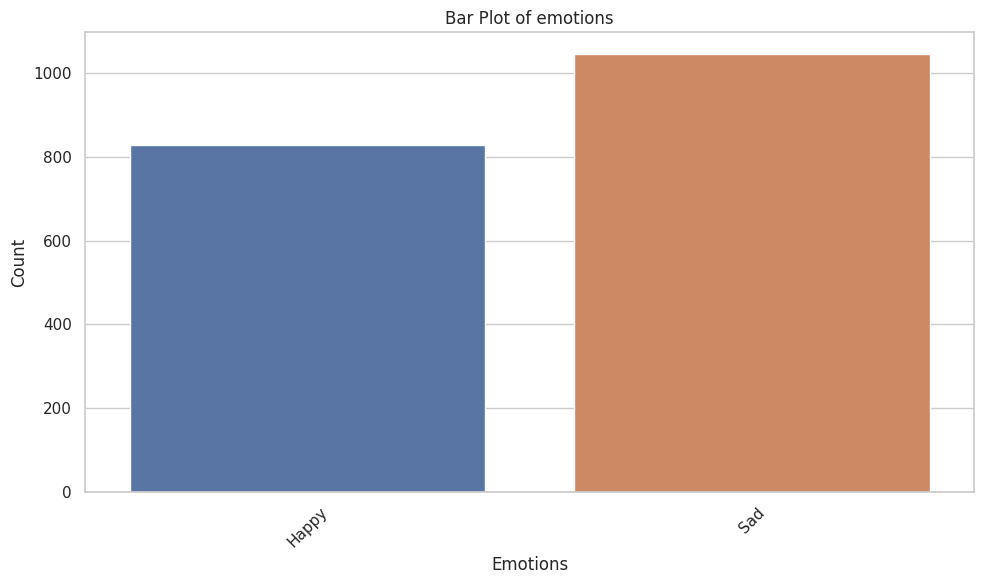

In [28]:
sns.set(style="whitegrid")  # Set style for the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create the bar plot
sns.barplot(x=list(string_counts.keys()), y=list(string_counts.values()))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Bar Plot of emotions")
plt.tight_layout()

plt.show()  # Display the plot

#### Visualize sample audio signal using librosa

## RMS

In [29]:
# YOUR CODE HERE
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [30]:
rms_happy = librosa.feature.rms(y = happy_signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_sad = librosa.feature.rms(y = sad_signal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [31]:
frames = range(len(rms_happy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

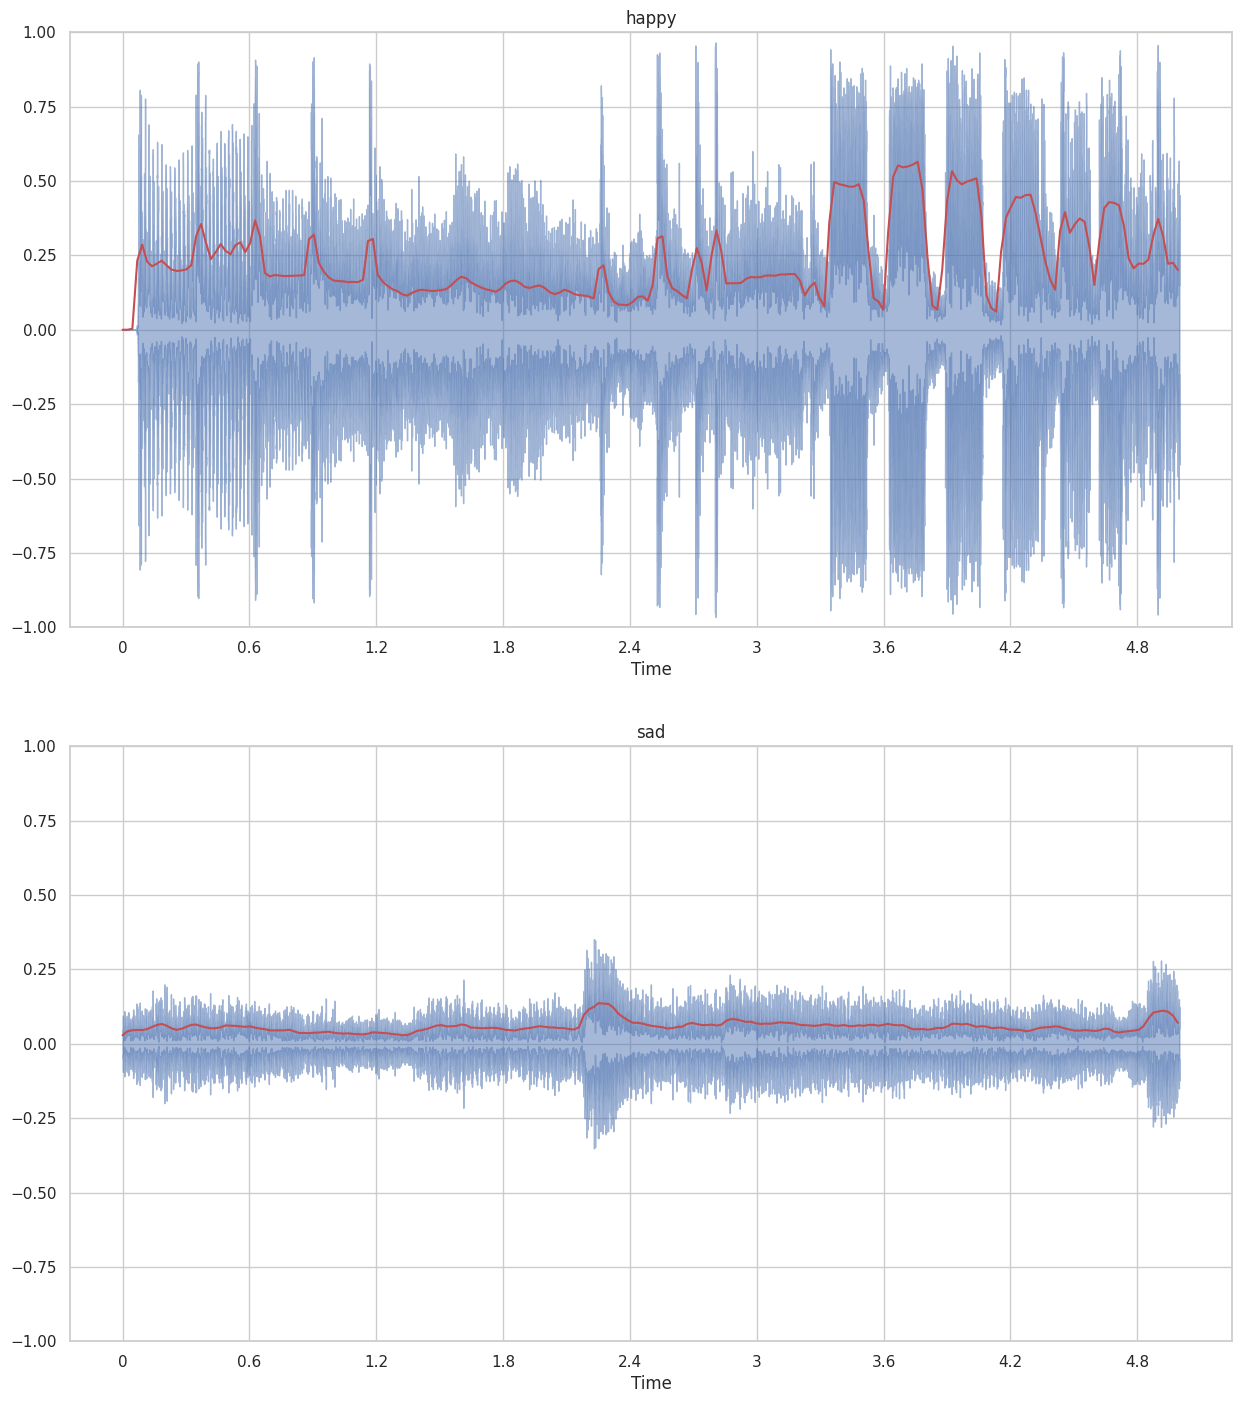

In [32]:
# rms energy is graphed in red
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveshow(happy_signal, alpha=0.5)
plt.plot(t, rms_happy, color="r")
plt.ylim((-1, 1))
plt.title("happy")

plt.subplot(2, 1, 2)
librosa.display.waveshow(sad_signal, alpha=0.5)
plt.plot(t, rms_sad, color="r")
plt.ylim((-1, 1))
plt.title("sad");

In [33]:
def plot_2spectrograms(spec1, spec2, title1=None, title2=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed
    axs1.set_title(title1 or "Spectrogram (db)")
    axs1.set_ylabel(ylabel)
    axs1.set_xlabel("frame")
    axs2.set_title(title2 or "Spectrogram (db)")
    axs2.set_ylabel(ylabel)
    axs2.set_xlabel("frame")
    im1 = axs1.imshow(librosa.power_to_db(spec1), origin="lower", aspect=aspect)
    im2 = axs2.imshow(librosa.power_to_db(spec2), origin="lower", aspect=aspect)
    if xmax:
        axs1.set_xlim((0, xmax))
        axs2.set_xlim((0, xmax))
    fig.colorbar(im1, ax=axs1)
    fig.colorbar(im2, ax=axs2)
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show(block=False)

In [34]:
happy_signal,sample_rate =  librosa.load("/content/Train/Train/Happy/Happy10200.wav", duration = 5, offset=0.5, sr=None)
happy_waveform = torch.tensor(happy_signal).reshape(1,-1)
sample_rate = sample_rate

happy_waveform, sample_rate

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.4351, 0.3737, 0.3355]]), 44100)

In [35]:
sad_signal, sample_rate  =  librosa.load("/content/Train/Train/Sad/Sad38804.wav", duration=5, offset=0.5, sr=None)
sad_waveform = torch.tensor(sad_signal).reshape(1,-1)
sample_rate = sample_rate

sad_waveform, sample_rate

(tensor([[-0.0193, -0.0196, -0.0193,  ..., -0.0191, -0.0134, -0.0102]]), 44100)

## MFCC transform

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (1025) may be set too low.
  warnings.warn(


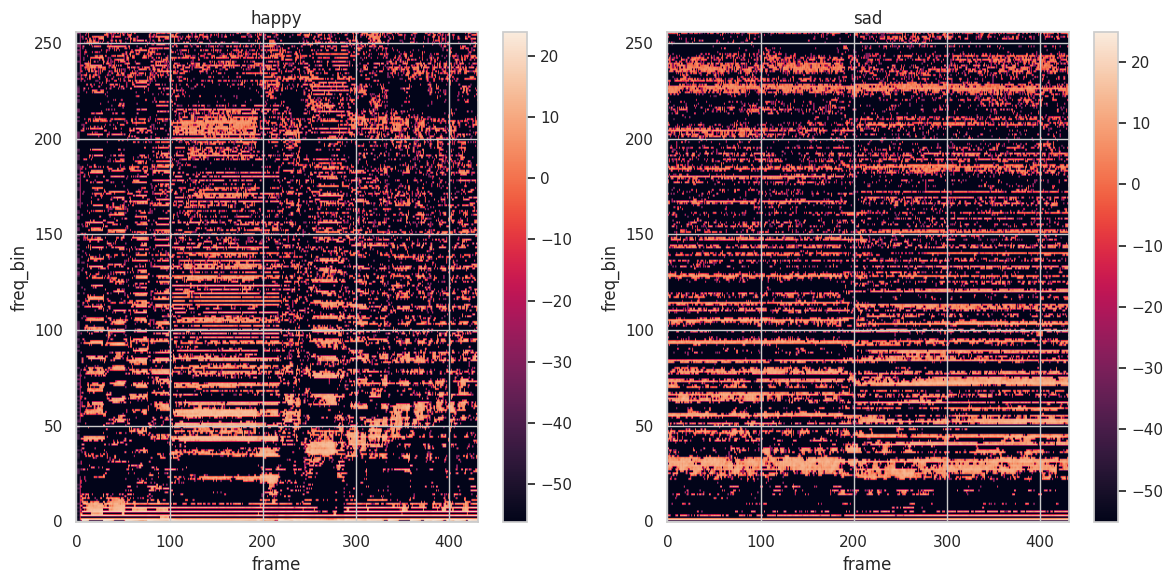

In [36]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

mfcc1 = mfcc_transform(happy_waveform)
mfcc2 = mfcc_transform(sad_waveform)

plot_2spectrograms(mfcc1[0], mfcc2[0], title1='happy',title2='sad')

## Spectogram

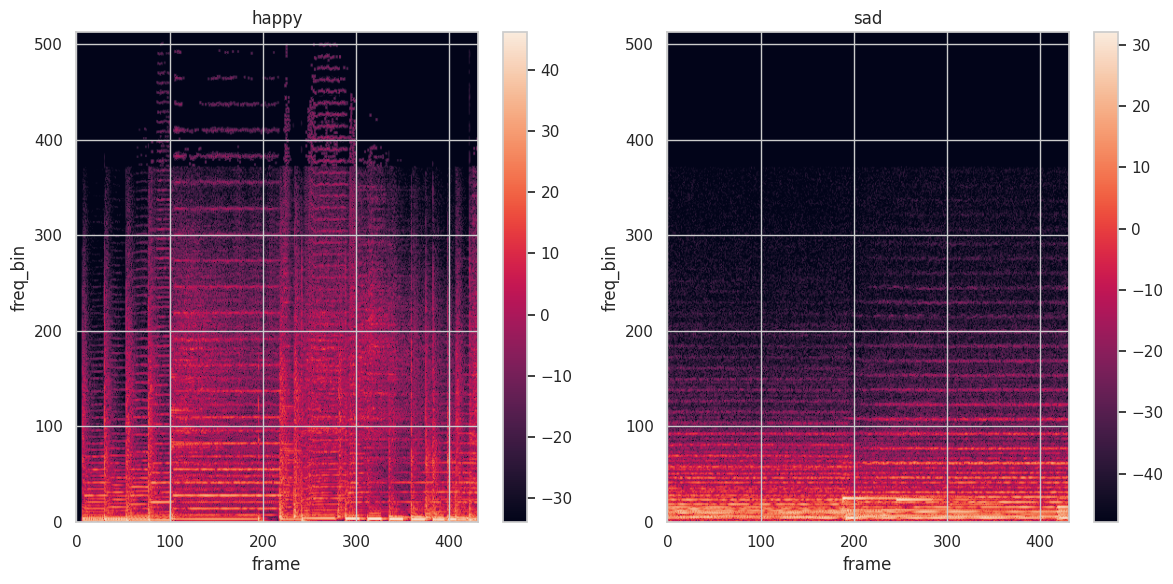

In [37]:
n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
happy_spec = spectrogram(happy_waveform)
sad_spec = spectrogram(sad_waveform)

plot_2spectrograms(happy_spec[0], sad_spec[0], title1='happy',title2='sad')

## Mel Spectogram

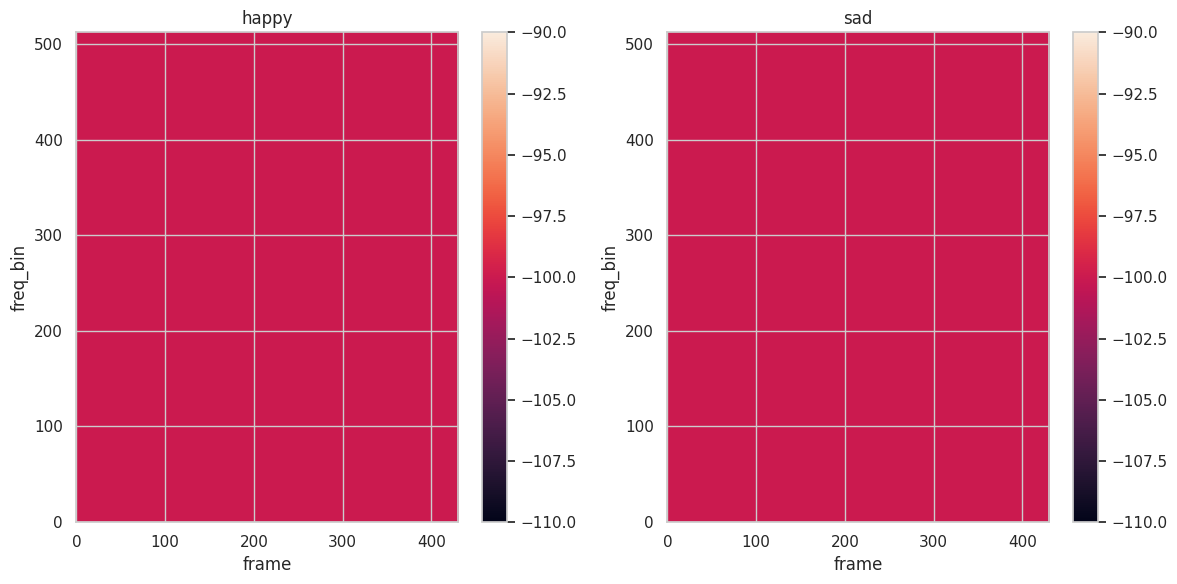

In [38]:
n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

happy_spec = spectrogram(happy_waveform)
sad_spec = spectrogram(sad_waveform)

mel_spec_db_happy = librosa.power_to_db(happy_spec, ref=np.max)
mel_spec_db_sad = librosa.power_to_db(sad_spec, ref=np.max)
# Perform transformation

plot_2spectrograms(mel_spec_db_happy[0], mel_spec_db_sad[0], title1='happy',title2='sad')

### **Stage 3:** Feature extraction (2 points)


In [39]:
train_paths1_np = np.array(train_paths1)
train_labels1_np = np.array(train_labels1)

In [40]:
data_size = train_paths1_np.shape[0]  # Get the size of the data array
np.random.seed(13)  # Set the seed for reproducibility
index_array = np.arange(data_size)  # Create an index array
np.random.shuffle(index_array)  # Shuffle the index array
train_size = 0.8  # Percentage of data for training
test_size = 1 - train_size
train_end = int(data_size * train_size)  # Index where training data ends
train_indices = index_array[:train_end]  # Indices for training data
test_indices = index_array[train_end:]   # Indices for test data
train_paths2 = train_paths1_np[train_indices]
train_labels2 = train_labels1_np[train_indices]
val_paths2 = train_paths1_np[test_indices]
val_labels2 = train_labels1_np[test_indices]

In [41]:
len(train_paths2), len(train_labels2), len(val_paths2), len(val_labels2)

(1498, 1498, 375, 375)

In [42]:
train_paths3 = np.concatenate([train_paths2, train_paths2, train_paths2])
train_labels3 = np.concatenate([train_labels2, train_labels2, train_labels2])

In [43]:
len(train_paths3), len(train_labels3)

(4494, 4494)

### Data augmentation

In [44]:
def addAWGN(signal, num_bits=16, augmented_num=2, snr_low=15, snr_high=30):
    signal_len = len(signal)
    # Generate White Gaussian noise
    noise = np.random.normal(size=(augmented_num, signal_len))
    # Normalize signal and noise
    norm_constant = 2.0**(num_bits-1)
    signal_norm = signal / norm_constant
    noise_norm = noise / norm_constant
    # Compute signal and noise power
    s_power = np.sum(signal_norm ** 2) / signal_len
    n_power = np.sum(noise_norm ** 2, axis=1) / signal_len
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(snr_low, snr_high)
    # Compute K (covariance matrix) for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- target_snr / 10))
    K = np.ones((signal_len, augmented_num)) * K
    # Generate noisy signal
    return signal + K.T * noise

In [45]:
def getMFCC(audio, sample_rate = SAMPLE_RATE):
    mfcc = librosa.feature.mfcc(y=audio,
                                sr=sample_rate,
                                n_fft=1024,
                                win_length = 512,
                                window='hamming',
                                hop_length = 256,
                                n_mfcc=13,
                                fmax=sample_rate/2
                               )
    return mfcc

In [46]:
train_paths4 = []
train_labels4 = []

In [47]:
for idx in range(len(train_paths3)):
    audio, sample_rate = librosa.load(train_paths3[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
    signal = np.zeros((int(SAMPLE_RATE*5)))
    if len(audio)<SAMPLE_RATE*5:
        signal[:len(audio)] = audio
    else:
        signal = audio[:SAMPLE_RATE*5]

    EMOTIONS = {'Happy': 1, 'Sad': 0}
    labels = train_labels3[idx]
    labels = EMOTIONS[labels]
    labels = np.array(labels)
    if idx >= 1499 and idx<2996:
      signal = addAWGN(signal)[0]
    elif idx >= 2996:
      signal = addAWGN(signal)[1]
    signal = getMFCC(signal)
    train_paths4.append(signal)
    train_labels4.append(labels)

<ipython-input-47-cc232d5ff626>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(train_paths3[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-47-cc232d5ff626>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(train_paths3[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-47-cc232d5ff626>:2: UserWarning: PySoundFile failed. Trying audioread

In [48]:
len(train_paths4)

4494

In [49]:
test_paths4 = []
test_labels4 = []

In [50]:
for idx in range(len(test_paths1)):
    audio, sample_rate = librosa.load(test_paths1[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
    signal = np.zeros((int(SAMPLE_RATE*5)))
    if len(audio)<SAMPLE_RATE*5:
        signal[:len(audio)] = audio
    else:
        signal = audio[:SAMPLE_RATE*5]

    signals = np.array(signal)
    EMOTIONS = {'Happy': 1, 'Sad': 0}
    labels = train_labels3[idx]
    labels = EMOTIONS[labels]
    labels = np.array(labels)
    signal = getMFCC(signals)
    test_paths4.append(signal)
    test_labels4.append(labels)

<ipython-input-50-39a1c023256b>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(test_paths1[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-50-39a1c023256b>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(test_paths1[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [51]:
val_paths4 = []
val_labels4 = []

In [52]:
for idx in range(len(val_paths2)):
    audio, sample_rate = librosa.load(val_paths2[idx], duration=5, offset=0.5, sr=SAMPLE_RATE)
    signal = np.zeros((int(SAMPLE_RATE*5)))
    if len(audio)<SAMPLE_RATE*5:
        signal[:len(audio)] = audio
    else:
        signal = audio[:SAMPLE_RATE*5]

    signals = np.array(signal)
    EMOTIONS = {'Happy': 1, 'Sad': 0}
    labels = train_labels3[idx]
    labels = EMOTIONS[labels]
    labels = np.array(labels)
    signal = getMFCC(signals)
    val_paths4.append(signal)
    val_labels4.append(labels)

### Create Dataset

In [53]:
# YOUR CODE HERE
class MusicalEmotionsDataset(Dataset):

    def __init__(self, path, label):
        self.path = path
        self.label = label

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        signal = self.path[idx]
        label = self.label[idx]
        signal = torch.tensor(signal, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        return signal, label

In [54]:
train_paths4_np = np.array(train_paths4)
train_labels4_np = np.array(train_labels4)
test_paths4_np = np.array(test_paths4)
test_labels4_np = np.array(test_labels4)
val_paths4_np = np.array(val_paths4)
val_labels4_np = np.array(val_labels4)

In [55]:
train_dataset5 = MusicalEmotionsDataset(train_paths4_np, train_labels4_np)
test_dataset5 = MusicalEmotionsDataset(test_paths4_np, test_labels4_np)
val_dataset5 = MusicalEmotionsDataset(val_paths4_np, val_labels4_np)

In [56]:
batch_size = 128
device = 'cuda'
if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

In [57]:
train_loader = torch.utils.data.DataLoader(
    train_dataset5,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

valid_loader = torch.utils.data.DataLoader(
    val_dataset5,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

test_loader = torch.utils.data.DataLoader(
    test_dataset5,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers,
    pin_memory=pin_memory,
)

In [58]:
try_train_loader = next(iter(train_loader))
try_train_loader[0].shape

torch.Size([128, 13, 431])

In [59]:
try_test_loader = next(iter(test_loader))
try_test_loader[0].shape

torch.Size([128, 13, 431])

In [60]:
try_val_loader = next(iter(valid_loader))
try_val_loader[0].shape

torch.Size([128, 13, 431])

### **Stage 4:** Train the model  (4 points)


In [61]:
# YOUR CODE HERE
import torch
import torch.nn as nn

class ParallelModel(nn.Module):
    def __init__(self):
        super().__init__()
        # conv block
        self.conv2Dblock = nn.Sequential(
            # 1. conv block
            nn.BatchNorm2d(1),
            nn.Conv2d(in_channels=1,
                       out_channels=4,
                       kernel_size=2,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3),
            # 2. conv block
            nn.Conv2d(in_channels=4,
                       out_channels=8,
                       kernel_size=2,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3),
            # 3. conv block
            nn.Conv2d(in_channels=8,
                       out_channels=16,
                       kernel_size=2,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3),
            # 4. conv block
            nn.Conv2d(in_channels=16,
                       out_channels=32,
                       kernel_size=3,
                       stride=1,
                       padding=1
                      ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.3)
        )
        # LSTM block
        self.lstm_maxpool = nn.MaxPool2d(kernel_size=[2,4], stride=[2,4])
        hidden_size = 128
        self.lstm = nn.LSTM(input_size=6,hidden_size=hidden_size,bidirectional=True, batch_first=True)
        self.dropout_lstm = nn.Dropout(0.2)
        self.attention_linear = nn.Linear(2*hidden_size,1) # 2*hidden_size for the 2 outputs of bidir LSTM
        # Linear softmax layer
        self.out_linear = nn.Linear(1120,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        # conv embedding
        if x.ndim == 3:
            x = x[:, None,:, :]
        else:
            a,b,c,d = x.shape
            x = x.reshape([b,a,c,d])
        conv_embedding = self.conv2Dblock(x) #(b,channel,freq,time)
        conv_embedding = torch.flatten(conv_embedding, start_dim=1) # do not flatten batch dimension
        # lstm embedding
        x_reduced = self.lstm_maxpool(x)
        x_reduced = torch.squeeze(x_reduced,1)
        x_reduced = x_reduced.permute(0,2,1) # (b,t,freq)
        lstm_embedding, (h,c) = self.lstm(x_reduced) # (b, time, hidden_size*2)
        lstm_embedding = self.dropout_lstm(lstm_embedding)
        batch_size,T,_ = lstm_embedding.shape
        attention_weights = [None]*T
        for t in range(T):
            embedding = lstm_embedding[:,t,:]
            attention_weights[t] = self.attention_linear(embedding)
        attention_weights_norm = nn.functional.softmax(torch.stack(attention_weights,-1),-1)
        attention = torch.bmm(attention_weights_norm,lstm_embedding) # (Bx1xT)*(B,T,hidden_size*2)=(B,1,2*hidden_size)
        attention = torch.squeeze(attention, 1)
        complete_embedding = torch.cat([conv_embedding, attention], dim=1)
        output_logits = self.out_linear(complete_embedding)
        binary_output  = self.sigmoid(output_logits)
        return binary_output



In [62]:
def binary_loss_fnc(predictions, targets):
    return nn.BCELoss()(input=predictions, target=targets.float())

In [66]:
model = ParallelModel()
optimizer = torch.optim.Adam(model.parameters())
model.to(device)
print(model)

ParallelModel(
  (conv2Dblock): Sequential(
    (0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.3, inplace=False)
    (6): Conv2d(4, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.3, inplace=False)
    (11): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [67]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


n = count_parameters(model)
print("Number of parameters: %s" % n)

Number of parameters: 146088


In [68]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [69]:
def train(model, epoch, log_interval):
    loss_fn = nn.BCELoss()
    model.train()
    losses = []
    accuracies = []
    prededicted_train = []
    acutal_train = []
    actual_value1 = np.array([])
    predz2 = np.array([])
    for batch_idx, (data, target) in enumerate(train_loader):

        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output.squeeze().to(torch.float32), target.to(torch.float32))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        prededicted_train.append(output.detach().cpu().numpy())
        acutal_train.append(target.detach().cpu().numpy())

        # print training stats
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

        # update progress bar
        pbar.update(pbar_update)

        # record loss
        losses.append(loss.item())

    for i in range(len(acutal_train)):
        actual_value1 = np.append(actual_value1,acutal_train[i])
        predz2 = np.append(predz2,np.array([0 if j<0.5 else 1 for j in prededicted_train[i]]))

    accuracies = accuracy_score(actual_value1, predz2)
    print(np.mean(losses), accuracies)
    return np.mean(losses), accuracies

In [70]:
def test(model):
    model.eval()
    losses = []
    accuracies = []
    prededicted_test = []
    acutal_test = []
    actual_value1 = np.array([])
    predz2 = np.array([])
    for data, target in valid_loader:
        data = data.to(device)
        target = target.to(device)

        output = model(data)

        prededicted_test.append(output.detach().cpu().numpy())
        acutal_test.append(target.detach().cpu().numpy())

        # update progress bar
        pbar.update(pbar_update)


    for i in range(len(acutal_test)):
        actual_value1 = np.append(actual_value1,acutal_test[i])
        predz2 = np.append(predz2,np.array([0 if j<0.5 else 1 for j in prededicted_test[i]]))

    accuracies = accuracy_score(actual_value1, predz2)
    print('validation',accuracies)
    return accuracies

  0%|          | 0.07692307692307693/100 [00:01<27:03, 16.25s/it]  

Train Epoch: 1 [0/4494 (0%)]	Loss: 0.745688


  1%|          | 0.8974358974358979/100 [00:04<05:10,  3.14s/it]

0.6986049148771498 0.5749888740542947


  1%|          | 0.9487179487179492/100 [00:04<07:04,  4.28s/it]

validation 0.5093333333333333
epoch 1 done


  1%|          | 1.076923076923077/100 [00:05<06:54,  4.19s/it]

Train Epoch: 2 [0/4494 (0%)]	Loss: 0.711071


  2%|▏         | 1.8974358974358947/100 [00:07<04:50,  2.96s/it]

0.6557922661304474 0.6157098353360035


  2%|▏         | 1.9487179487179458/100 [00:07<05:33,  3.41s/it]

validation 0.48
epoch 2 done


  2%|▏         | 2.0256410256410224/100 [00:07<05:41,  3.48s/it]

Train Epoch: 3 [0/4494 (0%)]	Loss: 0.658900


  3%|▎         | 2.897435897435891/100 [00:10<04:49,  2.99s/it]

0.6419516272015042 0.6384067645749889


  3%|▎         | 2.9487179487179422/100 [00:10<05:35,  3.46s/it]

validation 0.496
epoch 3 done


  3%|▎         | 3.025641025641019/100 [00:11<05:40,  3.51s/it] 

Train Epoch: 4 [0/4494 (0%)]	Loss: 0.639445


  4%|▍         | 3.8974358974358876/100 [00:13<04:47,  2.99s/it]

0.6238753514157401 0.6499777481085892


  4%|▍         | 3.9487179487179387/100 [00:13<05:27,  3.41s/it]

validation 0.472
epoch 4 done


  4%|▍         | 4.025641025641016/100 [00:14<05:26,  3.41s/it] 

Train Epoch: 5 [0/4494 (0%)]	Loss: 0.543216


  5%|▍         | 4.8974358974358845/100 [00:17<05:10,  3.26s/it]

0.5879606174098121 0.6858032932799288


  5%|▍         | 4.948717948717936/100 [00:17<06:44,  4.25s/it] 

validation 0.5013333333333333
epoch 5 done


  5%|▌         | 5.025641025641012/100 [00:17<06:47,  4.29s/it]

Train Epoch: 6 [0/4494 (0%)]	Loss: 0.596330


  6%|▌         | 5.897435897435881/100 [00:20<04:38,  2.96s/it]

0.5756538319918845 0.6873609256786827


  6%|▌         | 5.948717948717932/100 [00:20<05:18,  3.39s/it]

validation 0.4666666666666667
epoch 6 done


  6%|▌         | 6.025641025641009/100 [00:20<05:28,  3.50s/it]

Train Epoch: 7 [0/4494 (0%)]	Loss: 0.497676


  7%|▋         | 6.897435897435877/100 [00:23<04:35,  2.96s/it]

0.5501387963692347 0.7149532710280374


  7%|▋         | 6.9487179487179285/100 [00:23<05:14,  3.38s/it]

validation 0.464
epoch 7 done


  7%|▋         | 7.025641025641005/100 [00:23<05:20,  3.45s/it] 

Train Epoch: 8 [0/4494 (0%)]	Loss: 0.590486


  8%|▊         | 7.897435897435874/100 [00:26<04:33,  2.97s/it]

0.5473517527182897 0.7138406764574989


  8%|▊         | 7.948717948717925/100 [00:26<05:18,  3.46s/it]

validation 0.48
epoch 8 done


  8%|▊         | 8.025641025641002/100 [00:27<05:16,  3.44s/it]

Train Epoch: 9 [0/4494 (0%)]	Loss: 0.580893


  9%|▉         | 8.897435897435871/100 [00:29<04:57,  3.26s/it]

0.5336694758799341 0.7354250111259457


  9%|▉         | 8.948717948717922/100 [00:30<06:23,  4.21s/it]

validation 0.49066666666666664
epoch 9 done


  9%|▉         | 9.025641025640999/100 [00:30<05:56,  3.92s/it]

Train Epoch: 10 [0/4494 (0%)]	Loss: 0.568750


 10%|▉         | 9.897435897435868/100 [00:33<04:25,  2.95s/it]

0.5082847095198102 0.7485536270583


 10%|▉         | 9.948717948717919/100 [00:33<05:05,  3.39s/it]

validation 0.488
epoch 10 done


 10%|█         | 10.025641025640995/100 [00:33<05:11,  3.46s/it]

Train Epoch: 11 [0/4494 (0%)]	Loss: 0.515969


 11%|█         | 10.897435897435864/100 [00:36<04:22,  2.94s/it]

0.4895857531163428 0.7534490431686693


 11%|█         | 10.948717948717915/100 [00:36<05:03,  3.41s/it]

validation 0.47733333333333333
epoch 11 done


 11%|█         | 11.025641025640992/100 [00:36<05:05,  3.44s/it]

Train Epoch: 12 [0/4494 (0%)]	Loss: 0.422476


 12%|█▏        | 11.89743589743586/100 [00:39<04:19,  2.94s/it]

0.4876843922668033 0.760347129506008


 12%|█▏        | 11.948717948717912/100 [00:39<04:54,  3.35s/it]

validation 0.5013333333333333
epoch 12 done


 12%|█▏        | 12.025641025640988/100 [00:39<05:03,  3.44s/it]

Train Epoch: 13 [0/4494 (0%)]	Loss: 0.586161


 13%|█▎        | 12.897435897435857/100 [00:42<04:45,  3.28s/it]

0.48233240677250755 0.7634623943035158


 13%|█▎        | 12.948717948717908/100 [00:42<05:14,  3.61s/it]

validation 0.5013333333333333
epoch 13 done


 13%|█▎        | 13.025641025640985/100 [00:43<05:13,  3.60s/it]

Train Epoch: 14 [0/4494 (0%)]	Loss: 0.452694


 14%|█▍        | 13.897435897435853/100 [00:45<04:15,  2.97s/it]

0.43909456332524616 0.7859368046283934


 14%|█▍        | 13.948717948717904/100 [00:46<04:51,  3.38s/it]

validation 0.4826666666666667
epoch 14 done


 14%|█▍        | 14.025641025640981/100 [00:46<04:54,  3.42s/it]

Train Epoch: 15 [0/4494 (0%)]	Loss: 0.462158


 15%|█▍        | 14.89743589743585/100 [00:49<04:14,  2.99s/it] 

0.46687568889723885 0.7705829995549621


 15%|█▍        | 14.948717948717901/100 [00:49<04:51,  3.42s/it]

validation 0.512
epoch 15 done


 15%|█▌        | 15.025641025640978/100 [00:49<04:59,  3.52s/it]

Train Epoch: 16 [0/4494 (0%)]	Loss: 0.403445


 16%|█▌        | 15.897435897435846/100 [00:52<04:07,  2.94s/it]

0.4492618896894985 0.7874944370271473


 16%|█▌        | 15.948717948717897/100 [00:52<04:44,  3.38s/it]

validation 0.464
epoch 16 done


 16%|█▌        | 16.025641025640976/100 [00:52<04:49,  3.44s/it]

Train Epoch: 17 [0/4494 (0%)]	Loss: 0.405070


 17%|█▋        | 16.897435897435845/100 [00:55<04:21,  3.14s/it]

0.41817696972025764 0.7975077881619937


 17%|█▋        | 16.948717948717896/100 [00:55<04:53,  3.54s/it]

validation 0.4826666666666667
epoch 17 done


 17%|█▋        | 17.025641025640972/100 [00:56<04:52,  3.53s/it]

Train Epoch: 18 [0/4494 (0%)]	Loss: 0.468460


 18%|█▊        | 17.923076923076867/100 [00:59<04:51,  3.55s/it]

0.4262947456704246 0.8055184690698709


 18%|█▊        | 17.974358974358918/100 [00:59<06:35,  4.82s/it]

validation 0.49866666666666665
epoch 18 done


 18%|█▊        | 18.07692307692302/100 [01:00<07:56,  5.82s/it]

Train Epoch: 19 [0/4494 (0%)]	Loss: 0.366232


 19%|█▉        | 18.897435897435837/100 [01:03<04:00,  2.96s/it]

0.3920254897740152 0.8166444147752558


 19%|█▉        | 18.94871794871789/100 [01:03<04:34,  3.38s/it] 

validation 0.472
epoch 19 done


 19%|█▉        | 19.025641025640965/100 [01:03<04:36,  3.42s/it]

Train Epoch: 20 [0/4494 (0%)]	Loss: 0.437916


 20%|█▉        | 19.897435897435834/100 [01:06<04:22,  3.27s/it]

0.3978479653596878 0.8193146417445483


 20%|█▉        | 19.948717948717885/100 [01:06<05:34,  4.18s/it]

validation 0.4826666666666667
epoch 20 done


 20%|██        | 20.076923076923013/100 [01:07<05:30,  4.14s/it]

Train Epoch: 21 [0/4494 (0%)]	Loss: 0.399059


 21%|██        | 20.89743589743583/100 [01:09<03:56,  2.99s/it]

0.39386940747499466 0.8199821984868714


 21%|██        | 20.94871794871788/100 [01:10<04:29,  3.41s/it]

validation 0.488
epoch 21 done


 21%|██        | 21.025641025640958/100 [01:10<04:34,  3.47s/it]

Train Epoch: 22 [0/4494 (0%)]	Loss: 0.383915


 22%|██▏       | 21.897435897435827/100 [01:12<03:52,  2.98s/it]

0.3789261620905664 0.822429906542056


 22%|██▏       | 21.948717948717878/100 [01:13<04:25,  3.40s/it]

validation 0.49866666666666665
epoch 22 done


 22%|██▏       | 22.025641025640954/100 [01:13<04:29,  3.46s/it]

Train Epoch: 23 [0/4494 (0%)]	Loss: 0.434299


 23%|██▎       | 22.897435897435823/100 [01:16<03:48,  2.96s/it]

0.39104779726929134 0.8161993769470405


 23%|██▎       | 22.948717948717874/100 [01:16<04:26,  3.46s/it]

validation 0.5013333333333333
epoch 23 done


 23%|██▎       | 23.02564102564095/100 [01:16<04:26,  3.46s/it] 

Train Epoch: 24 [0/4494 (0%)]	Loss: 0.384647


 24%|██▍       | 23.89743589743582/100 [01:19<04:10,  3.29s/it]

0.39026239183213973 0.821762349799733


 24%|██▍       | 23.94871794871787/100 [01:19<05:29,  4.33s/it]

validation 0.4613333333333333
epoch 24 done


 24%|██▍       | 24.076923076923/100 [01:20<05:09,  4.07s/it]   

Train Epoch: 25 [0/4494 (0%)]	Loss: 0.396713


 25%|██▍       | 24.897435897435816/100 [01:22<03:46,  3.01s/it]

0.3641865679787265 0.8319982198486872


 25%|██▍       | 24.948717948717867/100 [01:23<04:17,  3.43s/it]

validation 0.48
epoch 25 done


 25%|██▌       | 25.025641025640944/100 [01:23<04:20,  3.47s/it]

Train Epoch: 26 [0/4494 (0%)]	Loss: 0.401445


 26%|██▌       | 25.897435897435813/100 [01:25<03:40,  2.98s/it]

0.365598078403208 0.8317757009345794


 26%|██▌       | 25.948717948717864/100 [01:26<04:12,  3.41s/it]

validation 0.464
epoch 26 done


 26%|██▌       | 26.02564102564094/100 [01:26<04:16,  3.47s/it] 

Train Epoch: 27 [0/4494 (0%)]	Loss: 0.335738


 27%|██▋       | 26.89743589743581/100 [01:29<03:41,  3.03s/it] 

0.34233596093124813 0.8449043168669337


 27%|██▋       | 26.94871794871786/100 [01:29<04:15,  3.50s/it]

validation 0.4826666666666667
epoch 27 done


 27%|██▋       | 27.025641025640937/100 [01:29<04:14,  3.49s/it]

Train Epoch: 28 [0/4494 (0%)]	Loss: 0.336485


 28%|██▊       | 27.897435897435805/100 [01:32<03:54,  3.25s/it]

0.34141627699136734 0.8437917222963952


 28%|██▊       | 27.948717948717857/100 [01:32<04:33,  3.79s/it]

validation 0.5013333333333333
epoch 28 done


 28%|██▊       | 28.025641025640933/100 [01:32<04:25,  3.69s/it]

Train Epoch: 29 [0/4494 (0%)]	Loss: 0.349634


 29%|██▉       | 28.897435897435802/100 [01:35<03:31,  2.98s/it]

0.33583156309194034 0.8473520249221184


 29%|██▉       | 28.948717948717853/100 [01:35<04:03,  3.43s/it]

validation 0.47733333333333333
epoch 29 done


 29%|██▉       | 29.02564102564093/100 [01:36<04:04,  3.45s/it] 

Train Epoch: 30 [0/4494 (0%)]	Loss: 0.354692


 30%|██▉       | 29.8974358974358/100 [01:38<03:30,  3.00s/it]  

0.3295435735748874 0.8522474410324877


 30%|██▉       | 29.94871794871785/100 [01:39<04:03,  3.47s/it]

validation 0.488
epoch 30 done


 30%|███       | 30.025641025640926/100 [01:39<04:06,  3.53s/it]

Train Epoch: 31 [0/4494 (0%)]	Loss: 0.367389


 31%|███       | 30.897435897435795/100 [01:41<03:26,  2.99s/it]

0.3718032298816575 0.8235425011125945


 31%|███       | 30.948717948717846/100 [01:42<03:55,  3.41s/it]

validation 0.49333333333333335
epoch 31 done


 31%|███       | 31.025641025640923/100 [01:42<03:58,  3.46s/it]

Train Epoch: 32 [0/4494 (0%)]	Loss: 0.315250


 32%|███▏      | 31.89743589743579/100 [01:45<03:34,  3.16s/it]

0.32011811724967426 0.8553627058299955


 32%|███▏      | 31.948717948717842/100 [01:45<04:03,  3.58s/it]

validation 0.47733333333333333
epoch 32 done


 32%|███▏      | 32.02564102564092/100 [01:45<04:07,  3.64s/it] 

Train Epoch: 33 [0/4494 (0%)]	Loss: 0.265673


 33%|███▎      | 32.89743589743591/100 [01:48<03:21,  3.00s/it] 

0.3085375643438763 0.8655985758789497


 33%|███▎      | 32.94871794871797/100 [01:48<03:47,  3.39s/it]

validation 0.488
epoch 33 done


 33%|███▎      | 33.02564102564106/100 [01:48<03:53,  3.48s/it]

Train Epoch: 34 [0/4494 (0%)]	Loss: 0.354739


 34%|███▍      | 33.89743589743605/100 [01:51<03:18,  3.00s/it]

0.314383947600921 0.8578104138851802


 34%|███▍      | 33.948717948718105/100 [01:51<03:47,  3.44s/it]

validation 0.4613333333333333
epoch 34 done


 34%|███▍      | 34.02564102564119/100 [01:52<03:48,  3.47s/it] 

Train Epoch: 35 [0/4494 (0%)]	Loss: 0.294192


 35%|███▍      | 34.89743589743618/100 [01:54<03:17,  3.03s/it] 

0.30097434173027676 0.8680462839341344


 35%|███▍      | 34.94871794871824/100 [01:55<03:44,  3.44s/it]

validation 0.49066666666666664
epoch 35 done


 35%|███▌      | 35.076923076923386/100 [01:55<04:10,  3.86s/it]

Train Epoch: 36 [0/4494 (0%)]	Loss: 0.264733


 36%|███▌      | 35.89743589743632/100 [01:58<03:13,  3.03s/it]

0.30200858331388897 0.8680462839341344


 36%|███▌      | 35.948717948718375/100 [01:58<03:44,  3.50s/it]

validation 0.464
epoch 36 done


 36%|███▌      | 36.02564102564146/100 [01:58<03:44,  3.51s/it] 

Train Epoch: 37 [0/4494 (0%)]	Loss: 0.311248


 37%|███▋      | 36.89743589743645/100 [02:01<03:07,  2.98s/it] 

0.2995278620057636 0.8664886515353805


 37%|███▋      | 36.94871794871851/100 [02:01<03:39,  3.48s/it]

validation 0.472
epoch 37 done


 37%|███▋      | 37.0256410256416/100 [02:01<03:40,  3.51s/it] 

Train Epoch: 38 [0/4494 (0%)]	Loss: 0.236129


 38%|███▊      | 37.89743589743659/100 [02:04<03:03,  2.95s/it]

0.29851628591616947 0.8716065865598576


 38%|███▊      | 37.948717948718645/100 [02:04<03:32,  3.42s/it]

validation 0.48533333333333334
epoch 38 done


 38%|███▊      | 38.02564102564173/100 [02:05<03:32,  3.44s/it] 

Train Epoch: 39 [0/4494 (0%)]	Loss: 0.244153


 39%|███▉      | 38.89743589743672/100 [02:07<03:07,  3.06s/it] 

0.2850535561641057 0.8736092567868269


 39%|███▉      | 38.94871794871878/100 [02:08<04:07,  4.06s/it]

validation 0.472
epoch 39 done


 39%|███▉      | 39.076923076923926/100 [02:08<04:09,  4.10s/it]

Train Epoch: 40 [0/4494 (0%)]	Loss: 0.260902


 40%|███▉      | 39.89743589743686/100 [02:11<03:02,  3.03s/it]

0.2754921201202605 0.8827325322652425


 40%|███▉      | 39.948717948718915/100 [02:11<03:33,  3.56s/it]

validation 0.5013333333333333
epoch 40 done


 40%|████      | 40.025641025642/100 [02:11<03:34,  3.58s/it]   

Train Epoch: 41 [0/4494 (0%)]	Loss: 0.283931


 41%|████      | 40.89743589743699/100 [02:14<02:57,  3.00s/it] 

0.29148359845081967 0.8718291054739653


 41%|████      | 40.94871794871905/100 [02:14<03:24,  3.46s/it]

validation 0.456
epoch 41 done


 41%|████      | 41.02564102564214/100 [02:14<03:31,  3.59s/it]

Train Epoch: 42 [0/4494 (0%)]	Loss: 0.274913


 42%|████▏     | 41.89743589743713/100 [02:17<02:55,  3.02s/it]

0.29077598452568054 0.8649310191366266


 42%|████▏     | 41.948717948719185/100 [02:17<03:18,  3.42s/it]

validation 0.488
epoch 42 done


 42%|████▏     | 42.02564102564227/100 [02:18<03:20,  3.46s/it] 

Train Epoch: 43 [0/4494 (0%)]	Loss: 0.302655


 43%|████▎     | 42.89743589743726/100 [02:20<03:04,  3.23s/it] 

0.25899412482976913 0.8896306186025812


 43%|████▎     | 42.94871794871932/100 [02:21<04:00,  4.22s/it]

validation 0.472
epoch 43 done


 43%|████▎     | 43.02564102564241/100 [02:21<04:11,  4.42s/it]

Train Epoch: 44 [0/4494 (0%)]	Loss: 0.308369


 44%|████▍     | 43.923076923078426/100 [02:25<02:45,  2.96s/it]

0.26873515877458787 0.8793947485536271


 44%|████▍     | 43.974358974360484/100 [02:25<03:11,  3.42s/it]

validation 0.4826666666666667
epoch 44 done


 44%|████▍     | 44.02564102564254/100 [02:25<03:38,  3.90s/it] 

Train Epoch: 45 [0/4494 (0%)]	Loss: 0.258761


 45%|████▍     | 44.89743589743753/100 [02:28<02:46,  3.02s/it] 

0.28921373561024666 0.8785046728971962


 45%|████▍     | 44.94871794871959/100 [02:28<03:10,  3.45s/it]

validation 0.456
epoch 45 done


 45%|████▌     | 45.02564102564268/100 [02:28<03:13,  3.51s/it]

Train Epoch: 46 [0/4494 (0%)]	Loss: 0.225457


 46%|████▌     | 45.89743589743767/100 [02:31<02:42,  3.00s/it]

0.30440670251846313 0.863150867823765


 46%|████▌     | 45.948717948719725/100 [02:31<03:05,  3.44s/it]

validation 0.472
epoch 46 done


 46%|████▌     | 46.02564102564281/100 [02:31<03:07,  3.47s/it] 

Train Epoch: 47 [0/4494 (0%)]	Loss: 0.225140


 47%|████▋     | 46.8974358974378/100 [02:34<02:53,  3.28s/it]  

0.2751995097431872 0.8751668891855807


 47%|████▋     | 46.94871794871986/100 [02:35<03:38,  4.12s/it]

validation 0.4666666666666667
epoch 47 done


 47%|████▋     | 47.02564102564295/100 [02:35<03:26,  3.90s/it]

Train Epoch: 48 [0/4494 (0%)]	Loss: 0.272562


 48%|████▊     | 47.89743589743794/100 [02:38<02:36,  3.00s/it]

0.24660006910562515 0.8967512238540276


 48%|████▊     | 47.948717948719995/100 [02:38<03:00,  3.47s/it]

validation 0.4746666666666667
epoch 48 done


 48%|████▊     | 48.02564102564308/100 [02:38<03:05,  3.57s/it] 

Train Epoch: 49 [0/4494 (0%)]	Loss: 0.225629


 49%|████▉     | 48.89743589743807/100 [02:41<02:33,  3.00s/it] 

0.26192905712458825 0.8867378727191811


 49%|████▉     | 48.94871794872013/100 [02:41<02:59,  3.53s/it]

validation 0.4533333333333333
epoch 49 done


 49%|████▉     | 49.02564102564322/100 [02:41<03:06,  3.66s/it]

Train Epoch: 50 [0/4494 (0%)]	Loss: 0.260780


 50%|████▉     | 49.89743589743821/100 [02:44<02:30,  3.01s/it]

0.2595231408874194 0.8829550511793502


 50%|████▉     | 49.948717948720265/100 [02:44<02:54,  3.49s/it]

validation 0.43733333333333335
epoch 50 done


 50%|█████     | 50.02564102564335/100 [02:44<02:57,  3.55s/it] 

Train Epoch: 51 [0/4494 (0%)]	Loss: 0.202324


 51%|█████     | 50.89743589743834/100 [02:47<02:39,  3.26s/it] 

0.233211955262555 0.8963061860258122


 51%|█████     | 50.9487179487204/100 [02:48<02:56,  3.60s/it] 

validation 0.4533333333333333
epoch 51 done


 51%|█████     | 51.02564102564349/100 [02:48<02:57,  3.63s/it]

Train Epoch: 52 [0/4494 (0%)]	Loss: 0.241877


 52%|█████▏    | 51.89743589743848/100 [02:51<02:23,  2.98s/it]

0.2226251212673055 0.9032042723631508


 52%|█████▏    | 51.948717948720535/100 [02:51<02:44,  3.43s/it]

validation 0.48533333333333334
epoch 52 done


 52%|█████▏    | 52.02564102564362/100 [02:51<02:47,  3.50s/it] 

Train Epoch: 53 [0/4494 (0%)]	Loss: 0.334787


 53%|█████▎    | 52.89743589743861/100 [02:54<02:21,  2.99s/it] 

0.2242758832871914 0.9025367156208278


 53%|█████▎    | 52.94871794872067/100 [02:54<02:43,  3.48s/it]

validation 0.472
epoch 53 done


 53%|█████▎    | 53.02564102564376/100 [02:54<02:47,  3.56s/it]

Train Epoch: 54 [0/4494 (0%)]	Loss: 0.235922


 54%|█████▍    | 53.89743589743875/100 [02:57<02:17,  2.98s/it]

0.2369485344323847 0.900089007565643


 54%|█████▍    | 53.948717948720805/100 [02:57<02:37,  3.42s/it]

validation 0.48533333333333334
epoch 54 done


 54%|█████▍    | 54.07692307692595/100 [02:58<02:50,  3.71s/it]

Train Epoch: 55 [0/4494 (0%)]	Loss: 0.193499


 55%|█████▍    | 54.89743589743888/100 [03:00<02:18,  3.07s/it] 

0.22328145015570852 0.9054294615042279


 55%|█████▍    | 54.94871794872094/100 [03:01<02:39,  3.54s/it]

validation 0.45866666666666667
epoch 55 done


 55%|█████▌    | 55.02564102564403/100 [03:01<02:42,  3.62s/it]

Train Epoch: 56 [0/4494 (0%)]	Loss: 0.205727


 56%|█████▌    | 55.923076923080046/100 [03:05<03:40,  5.00s/it]

0.22631623968482018 0.897196261682243


 56%|█████▌    | 55.948717948721075/100 [03:05<08:10, 11.13s/it]

validation 0.49066666666666664
epoch 56 done


 56%|█████▌    | 56.05128205128519/100 [03:06<06:24,  8.74s/it]

Train Epoch: 57 [0/4494 (0%)]	Loss: 0.221436


 57%|█████▋    | 56.92307692308018/100 [03:10<03:20,  4.67s/it]

0.22049463126394483 0.904539385847797


 57%|█████▋    | 56.94871794872121/100 [03:11<09:05, 12.67s/it]

validation 0.4693333333333333
epoch 57 done


 57%|█████▋    | 57.05128205128533/100 [03:12<07:44, 10.82s/it]

Train Epoch: 58 [0/4494 (0%)]	Loss: 0.213413


 58%|█████▊    | 57.923076923080316/100 [03:16<03:06,  4.42s/it]

0.2093453717728456 0.9132176234979973


 58%|█████▊    | 57.948717948721345/100 [03:16<04:59,  7.13s/it]

validation 0.4746666666666667
epoch 58 done


 58%|█████▊    | 58.05128205128546/100 [03:17<04:26,  6.35s/it]

Train Epoch: 59 [0/4494 (0%)]	Loss: 0.176751


 59%|█████▉    | 58.89743589743942/100 [03:20<02:26,  3.56s/it] 

0.22044624967707527 0.9058744993324432


 59%|█████▉    | 58.94871794872148/100 [03:21<03:14,  4.74s/it]

validation 0.4693333333333333
epoch 59 done


 59%|█████▉    | 59.0512820512856/100 [03:21<03:19,  4.86s/it] 

Train Epoch: 60 [0/4494 (0%)]	Loss: 0.238355


 60%|█████▉    | 59.89743589743956/100 [03:24<02:12,  3.31s/it]

0.20862819916672176 0.9127725856697819


 60%|█████▉    | 59.948717948721615/100 [03:24<02:51,  4.29s/it]

validation 0.47733333333333333
epoch 60 done


 60%|██████    | 60.07692307692676/100 [03:25<02:48,  4.23s/it]

Train Epoch: 61 [0/4494 (0%)]	Loss: 0.182655


 61%|██████    | 60.89743589743969/100 [03:28<01:57,  3.00s/it] 

0.26809871072570485 0.883177570093458


 61%|██████    | 60.94871794872175/100 [03:28<02:17,  3.53s/it]

validation 0.4666666666666667
epoch 61 done


 61%|██████    | 61.02564102564484/100 [03:28<02:19,  3.57s/it]

Train Epoch: 62 [0/4494 (0%)]	Loss: 0.325053


 62%|██████▏   | 61.89743589743983/100 [03:31<01:55,  3.04s/it]

0.26059911772608757 0.8887405429461505


 62%|██████▏   | 61.948717948721885/100 [03:31<02:15,  3.55s/it]

validation 0.464
epoch 62 done


 62%|██████▏   | 62.02564102564497/100 [03:31<02:16,  3.60s/it] 

Train Epoch: 63 [0/4494 (0%)]	Loss: 0.229419


 63%|██████▎   | 62.89743589743996/100 [03:34<01:51,  3.00s/it] 

0.23623977560136053 0.8931909212283045


 63%|██████▎   | 62.94871794872202/100 [03:34<02:08,  3.48s/it]

validation 0.4746666666666667
epoch 63 done


 63%|██████▎   | 63.02564102564511/100 [03:34<02:07,  3.46s/it]

Train Epoch: 64 [0/4494 (0%)]	Loss: 0.182861


 64%|██████▍   | 63.8974358974401/100 [03:37<02:00,  3.33s/it] 

0.2174628944032722 0.9056519804183356


 64%|██████▍   | 63.948717948722155/100 [03:38<02:35,  4.30s/it]

validation 0.4613333333333333
epoch 64 done


 64%|██████▍   | 64.02564102564523/100 [03:38<02:28,  4.14s/it] 

Train Epoch: 65 [0/4494 (0%)]	Loss: 0.215038


 65%|██████▍   | 64.89743589743998/100 [03:41<01:45,  3.00s/it]

0.20083715145786604 0.9109924343569203


 65%|██████▍   | 64.94871794872202/100 [03:41<02:04,  3.54s/it]

validation 0.47733333333333333
epoch 65 done


 65%|██████▌   | 65.02564102564509/100 [03:41<02:06,  3.62s/it]

Train Epoch: 66 [0/4494 (0%)]	Loss: 0.161717


 66%|██████▌   | 65.89743589743983/100 [03:44<01:41,  2.97s/it]

0.25748644148310024 0.8874054294615042


 66%|██████▌   | 65.94871794872188/100 [03:44<01:59,  3.51s/it]

validation 0.4533333333333333
epoch 66 done


 66%|██████▌   | 66.02564102564494/100 [03:44<02:01,  3.59s/it]

Train Epoch: 67 [0/4494 (0%)]	Loss: 0.247539


 67%|██████▋   | 66.89743589743969/100 [03:47<01:39,  3.00s/it]

0.2130262785487705 0.9125500667556742


 67%|██████▋   | 66.94871794872174/100 [03:47<01:57,  3.57s/it]

validation 0.4613333333333333
epoch 67 done


 67%|██████▋   | 67.0256410256448/100 [03:48<01:58,  3.58s/it] 

Train Epoch: 68 [0/4494 (0%)]	Loss: 0.115453


 68%|██████▊   | 67.89743589743955/100 [03:50<01:48,  3.37s/it]

0.181059494925042 0.9212283044058746


 68%|██████▊   | 67.9487179487216/100 [03:51<01:58,  3.71s/it] 

validation 0.47733333333333333
epoch 68 done


 68%|██████▊   | 68.02564102564466/100 [03:51<01:57,  3.68s/it]

Train Epoch: 69 [0/4494 (0%)]	Loss: 0.156312


 69%|██████▉   | 68.89743589743941/100 [03:54<01:33,  3.00s/it]

0.1835406335691611 0.920115709835336


 69%|██████▉   | 68.94871794872145/100 [03:54<01:48,  3.49s/it]

validation 0.4666666666666667
epoch 69 done


 69%|██████▉   | 69.02564102564452/100 [03:54<01:49,  3.53s/it]

Train Epoch: 70 [0/4494 (0%)]	Loss: 0.129368


 70%|██████▉   | 69.89743589743927/100 [03:57<01:30,  2.99s/it]

0.19603396372662651 0.9154428126390743


 70%|██████▉   | 69.94871794872131/100 [03:57<01:45,  3.52s/it]

validation 0.4613333333333333
epoch 70 done


 70%|███████   | 70.02564102564438/100 [03:57<01:46,  3.54s/it]

Train Epoch: 71 [0/4494 (0%)]	Loss: 0.173264


 71%|███████   | 70.89743589743912/100 [04:00<01:27,  3.00s/it]

0.1714262188308769 0.9270137961726747


 71%|███████   | 70.94871794872117/100 [04:00<01:40,  3.45s/it]

validation 0.456
epoch 71 done


 71%|███████   | 71.07692307692628/100 [04:01<01:44,  3.63s/it]

Train Epoch: 72 [0/4494 (0%)]	Loss: 0.130349


 72%|███████▏  | 71.89743589743898/100 [04:03<01:26,  3.07s/it]

0.1761669839421908 0.9243435692033823


 72%|███████▏  | 71.94871794872103/100 [04:04<01:39,  3.54s/it]

validation 0.44
epoch 72 done


 72%|███████▏  | 72.02564102564409/100 [04:04<01:41,  3.63s/it]

Train Epoch: 73 [0/4494 (0%)]	Loss: 0.150409


 73%|███████▎  | 72.89743589743884/100 [04:07<01:20,  2.97s/it]

0.17883403143948978 0.9252336448598131


 73%|███████▎  | 72.94871794872088/100 [04:07<01:32,  3.40s/it]

validation 0.488
epoch 73 done


 73%|███████▎  | 73.02564102564395/100 [04:07<01:34,  3.50s/it]

Train Epoch: 74 [0/4494 (0%)]	Loss: 0.111242


 74%|███████▍  | 73.8974358974387/100 [04:10<01:18,  2.99s/it] 

0.21017674749924076 0.9049844236760125


 74%|███████▍  | 73.94871794872074/100 [04:10<01:33,  3.58s/it]

validation 0.48
epoch 74 done


 74%|███████▍  | 74.02564102564381/100 [04:10<01:33,  3.60s/it]

Train Epoch: 75 [0/4494 (0%)]	Loss: 0.190788


 75%|███████▍  | 74.89743589743856/100 [04:13<01:15,  3.02s/it]

0.18107751715514395 0.9247886070315977


 75%|███████▍  | 74.9487179487206/100 [04:13<01:45,  4.21s/it] 

validation 0.4826666666666667
epoch 75 done


 75%|███████▌  | 75.07692307692571/100 [04:14<01:43,  4.15s/it]

Train Epoch: 76 [0/4494 (0%)]	Loss: 0.179005


 76%|███████▌  | 75.89743589743841/100 [04:17<01:12,  3.03s/it]

0.2044455441646278 0.9096573208722741


 76%|███████▌  | 75.94871794872046/100 [04:17<01:23,  3.48s/it]

validation 0.45866666666666667
epoch 76 done


 76%|███████▌  | 76.02564102564352/100 [04:17<01:25,  3.55s/it]

Train Epoch: 77 [0/4494 (0%)]	Loss: 0.288498


 77%|███████▋  | 76.89743589743827/100 [04:20<01:09,  3.01s/it]

0.18052246193918917 0.9218958611481975


 77%|███████▋  | 76.94871794872032/100 [04:20<01:22,  3.58s/it]

validation 0.4746666666666667
epoch 77 done


 77%|███████▋  | 77.02564102564338/100 [04:20<01:25,  3.74s/it]

Train Epoch: 78 [0/4494 (0%)]	Loss: 0.166930


 78%|███████▊  | 77.89743589743813/100 [04:23<01:05,  2.97s/it]

0.16133815826227269 0.9285714285714286


 78%|███████▊  | 77.94871794872017/100 [04:23<01:17,  3.52s/it]

validation 0.48533333333333334
epoch 78 done


 78%|███████▊  | 78.02564102564324/100 [04:23<01:18,  3.55s/it]

Train Epoch: 79 [0/4494 (0%)]	Loss: 0.225949


 79%|███████▉  | 78.89743589743799/100 [04:26<01:07,  3.19s/it]

0.17453233587245146 0.9243435692033823


 79%|███████▉  | 78.94871794872003/100 [04:26<01:29,  4.24s/it]

validation 0.4693333333333333
epoch 79 done


 79%|███████▉  | 79.07692307692514/100 [04:27<01:27,  4.20s/it]

Train Epoch: 80 [0/4494 (0%)]	Loss: 0.088314


 80%|███████▉  | 79.89743589743784/100 [04:30<01:00,  3.02s/it]

0.19390539162688786 0.9167779261237206


 80%|███████▉  | 79.94871794871989/100 [04:30<01:10,  3.50s/it]

validation 0.4613333333333333
epoch 80 done


 80%|████████  | 80.02564102564295/100 [04:30<01:10,  3.55s/it]

Train Epoch: 81 [0/4494 (0%)]	Loss: 0.103076


 81%|████████  | 80.8974358974377/100 [04:33<00:57,  3.00s/it] 

0.18292350653145048 0.9210057854917668


 81%|████████  | 80.94871794871975/100 [04:33<01:06,  3.47s/it]

validation 0.48
epoch 81 done


 81%|████████  | 81.02564102564281/100 [04:33<01:07,  3.54s/it]

Train Epoch: 82 [0/4494 (0%)]	Loss: 0.180703


 82%|████████▏ | 81.89743589743756/100 [04:36<00:54,  3.02s/it]

0.17042709700763226 0.9261237205162439


 82%|████████▏ | 81.9487179487196/100 [04:36<01:01,  3.42s/it] 

validation 0.472
epoch 82 done


 82%|████████▏ | 82.02564102564267/100 [04:37<01:03,  3.55s/it]

Train Epoch: 83 [0/4494 (0%)]	Loss: 0.180678


 83%|████████▎ | 82.92307692307844/100 [04:41<01:54,  6.72s/it]

0.15610963344160053 0.9345794392523364


 83%|████████▎ | 82.94871794871946/100 [04:41<02:47,  9.83s/it]

validation 0.48
epoch 83 done


 83%|████████▎ | 83.02564102564253/100 [04:41<01:50,  6.54s/it]

Train Epoch: 84 [0/4494 (0%)]	Loss: 0.159043


 84%|████████▍ | 83.89743589743728/100 [04:44<00:48,  3.03s/it]

0.15698533629377684 0.9296840231419671


 84%|████████▍ | 83.94871794871932/100 [04:45<00:55,  3.48s/it]

validation 0.4693333333333333
epoch 84 done


 84%|████████▍ | 84.02564102564239/100 [04:45<00:57,  3.59s/it]

Train Epoch: 85 [0/4494 (0%)]	Loss: 0.130383


 85%|████████▍ | 84.89743589743713/100 [04:48<00:46,  3.05s/it]

0.1582792993221018 0.9327992879394749


 85%|████████▍ | 84.94871794871918/100 [04:48<00:53,  3.54s/it]

validation 0.48533333333333334
epoch 85 done


 85%|████████▌ | 85.02564102564224/100 [04:48<00:53,  3.56s/it]

Train Epoch: 86 [0/4494 (0%)]	Loss: 0.175168


 86%|████████▌ | 85.89743589743699/100 [04:51<00:43,  3.09s/it]

0.1718638257847892 0.9252336448598131


 86%|████████▌ | 85.94871794871904/100 [04:51<00:59,  4.24s/it]

validation 0.4693333333333333
epoch 86 done


 86%|████████▌ | 86.07692307692415/100 [04:52<00:58,  4.22s/it]

Train Epoch: 87 [0/4494 (0%)]	Loss: 0.149936


 87%|████████▋ | 86.89743589743685/100 [04:54<00:39,  3.03s/it]

0.17960990737709734 0.9232309746328438


 87%|████████▋ | 86.9487179487189/100 [04:55<00:45,  3.47s/it] 

validation 0.49333333333333335
epoch 87 done


 87%|████████▋ | 87.02564102564196/100 [04:55<00:46,  3.56s/it]

Train Epoch: 88 [0/4494 (0%)]	Loss: 0.305840


 88%|████████▊ | 87.89743589743671/100 [04:58<00:36,  3.03s/it]

0.1792417700505919 0.9236760124610592


 88%|████████▊ | 87.94871794871875/100 [04:58<00:42,  3.49s/it]

validation 0.45866666666666667
epoch 88 done


 88%|████████▊ | 88.02564102564182/100 [04:58<00:42,  3.53s/it]

Train Epoch: 89 [0/4494 (0%)]	Loss: 0.123947


 89%|████████▉ | 88.89743589743657/100 [05:01<00:33,  3.00s/it]

0.17146048632760844 0.9247886070315977


 89%|████████▉ | 88.94871794871861/100 [05:01<00:38,  3.52s/it]

validation 0.4693333333333333
epoch 89 done


 89%|████████▉ | 89.02564102564168/100 [05:01<00:39,  3.61s/it]

Train Epoch: 90 [0/4494 (0%)]	Loss: 0.113674


 90%|████████▉ | 89.89743589743642/100 [05:04<00:32,  3.23s/it]

0.14213244234108263 0.9417000445037829


 90%|████████▉ | 89.94871794871847/100 [05:04<00:42,  4.24s/it]

validation 0.47733333333333333
epoch 90 done


 90%|█████████ | 90.07692307692358/100 [05:05<00:41,  4.15s/it]

Train Epoch: 91 [0/4494 (0%)]	Loss: 0.142703


 91%|█████████ | 90.89743589743628/100 [05:07<00:27,  3.03s/it]

0.13866312201652262 0.9388072986203827


 91%|█████████ | 90.94871794871833/100 [05:08<00:31,  3.48s/it]

validation 0.4613333333333333
epoch 91 done


 91%|█████████ | 91.02564102564139/100 [05:08<00:31,  3.55s/it]

Train Epoch: 92 [0/4494 (0%)]	Loss: 0.122656


 92%|█████████▏| 91.89743589743614/100 [05:11<00:24,  3.03s/it]

0.13740444742143154 0.942367601246106


 92%|█████████▏| 91.94871794871818/100 [05:11<00:28,  3.60s/it]

validation 0.4746666666666667
epoch 92 done


 92%|█████████▏| 92.02564102564125/100 [05:11<00:28,  3.61s/it]

Train Epoch: 93 [0/4494 (0%)]	Loss: 0.121185


 93%|█████████▎| 92.897435897436/100 [05:14<00:21,  3.02s/it]  

0.14612125563952658 0.9390298175344904


 93%|█████████▎| 92.94871794871804/100 [05:14<00:24,  3.48s/it]

validation 0.4746666666666667
epoch 93 done


 93%|█████████▎| 93.02564102564111/100 [05:14<00:24,  3.50s/it]

Train Epoch: 94 [0/4494 (0%)]	Loss: 0.102915


 94%|█████████▍| 93.89743589743586/100 [05:17<00:20,  3.29s/it]

0.15655320406787926 0.9359145527369827


 94%|█████████▍| 93.9487179487179/100 [05:18<00:26,  4.36s/it] 

validation 0.4666666666666667
epoch 94 done


 94%|█████████▍| 94.07692307692301/100 [05:18<00:25,  4.22s/it]

Train Epoch: 95 [0/4494 (0%)]	Loss: 0.156631


 95%|█████████▍| 94.89743589743571/100 [05:21<00:15,  3.03s/it]

0.17465364498396715 0.9236760124610592


 95%|█████████▍| 94.94871794871776/100 [05:21<00:17,  3.56s/it]

validation 0.47733333333333333
epoch 95 done


 95%|█████████▌| 95.02564102564082/100 [05:21<00:17,  3.60s/it]

Train Epoch: 96 [0/4494 (0%)]	Loss: 0.138835


 96%|█████████▌| 95.89743589743557/100 [05:24<00:12,  3.00s/it]

0.14538275455642077 0.9350244770805518


 96%|█████████▌| 95.94871794871761/100 [05:24<00:14,  3.46s/it]

validation 0.4746666666666667
epoch 96 done


 96%|█████████▌| 96.02564102564068/100 [05:24<00:14,  3.55s/it]

Train Epoch: 97 [0/4494 (0%)]	Loss: 0.186754


 97%|█████████▋| 96.89743589743543/100 [05:27<00:09,  2.99s/it]

0.1462425674415297 0.9392523364485982


 97%|█████████▋| 96.94871794871747/100 [05:27<00:10,  3.49s/it]

validation 0.456
epoch 97 done


 97%|█████████▋| 97.02564102564054/100 [05:27<00:10,  3.52s/it]

Train Epoch: 98 [0/4494 (0%)]	Loss: 0.123788


 98%|█████████▊| 97.89743589743529/100 [05:30<00:06,  3.24s/it]

0.1307474621054199 0.9445927903871829


 98%|█████████▊| 97.94871794871733/100 [05:31<00:07,  3.71s/it]

validation 0.48533333333333334
epoch 98 done


 98%|█████████▊| 98.0256410256404/100 [05:31<00:07,  3.69s/it] 

Train Epoch: 99 [0/4494 (0%)]	Loss: 0.091744


 99%|█████████▉| 98.89743589743514/100 [05:34<00:03,  3.03s/it]

0.1435879555841287 0.9392523364485982


 99%|█████████▉| 98.94871794871719/100 [05:34<00:03,  3.48s/it]

validation 0.45866666666666667
epoch 99 done


 99%|█████████▉| 99.02564102564025/100 [05:34<00:03,  3.55s/it]

Train Epoch: 100 [0/4494 (0%)]	Loss: 0.099731


100%|█████████▉| 99.897435897435/100 [05:37<00:00,  3.01s/it]  

0.19586901346014607 0.9141076991544281


100%|█████████▉| 99.99999999999909/100 [05:37<00:00,  3.38s/it]


validation 0.464
epoch 100 done


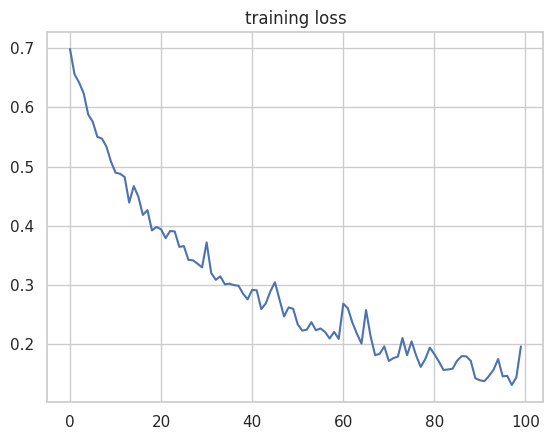

In [71]:
log_interval = 100
n_epoch = 100

pbar_update = 1 / (len(train_loader) + len(valid_loader))

losses = []
accuracies = []
# The transform needs to live on the same device as the model and the data.
with tqdm(total=n_epoch) as pbar:
    for epoch in range(1, n_epoch + 1):
        train_loss, train_accuracy = train(model, epoch, log_interval)
        test_accuracy = test(model)
        losses.append(train_loss)
        print(f"epoch {epoch} done")
        accuracies.append([train_accuracy, test_accuracy])

# Let's plot the training loss versus the number of iteration.
plt.plot(losses);
plt.title("training loss");

In [72]:
prededicted_val = []
acutal_val = []
for i,j in valid_loader:
    model.eval()
    y_hat_tensor = model(i.to(device))
    prededicted_val.append(y_hat_tensor.detach().cpu().numpy())
    acutal_val.append(j.detach().cpu().numpy())

<Axes: ylabel='Count'>

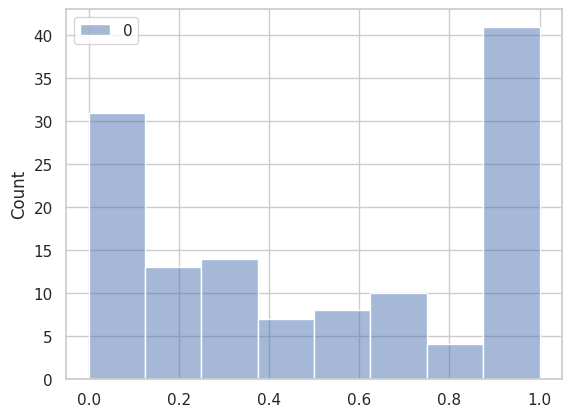

In [73]:
sns.histplot(prededicted_val[0])

In [74]:
actual_value1 = np.array([])
predz2 = np.array([])
for i in range(len(acutal_val)):
    actual_value1 = np.append(actual_value1,acutal_val[i])
    predz2 = np.append(predz2,np.array([0 if j<0.5 else 1 for j in prededicted_val[i]]))

In [75]:
from sklearn.metrics import classification_report
print(classification_report(actual_value1, predz2, target_names=['HAPPY','SAD']))

              precision    recall  f1-score   support

       HAPPY       0.52      0.45      0.48       208
         SAD       0.41      0.49      0.45       167

    accuracy                           0.46       375
   macro avg       0.47      0.47      0.46       375
weighted avg       0.47      0.46      0.47       375



In [76]:
prededicted_train = []
acutal_train = []
for i,j in train_loader:
    model.eval()
    y_hat_tensor = model(i.to(device))
    prededicted_train.append(y_hat_tensor.detach().cpu().numpy())
    acutal_train.append(j.detach().cpu().numpy())

<Axes: ylabel='Count'>

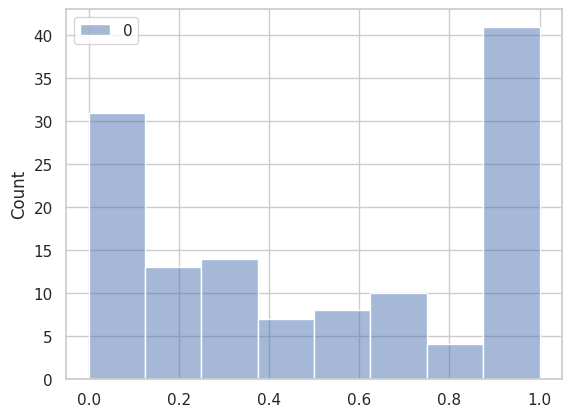

In [77]:
sns.histplot(prededicted_val[0])

In [79]:
actual_value1 = np.array([])
predz2 = np.array([])
for i in range(len(acutal_train)):
    actual_value1 = np.append(actual_value1,acutal_train[i])
    predz2 = np.append(predz2,np.array([0 if j<0.5 else 1 for j in prededicted_train[i]]))

In [80]:
from sklearn.metrics import classification_report
print(classification_report(actual_value1, predz2, target_names=['HAPPY','SAD']))

              precision    recall  f1-score   support

       HAPPY       0.97      0.91      0.94      2493
         SAD       0.90      0.97      0.93      2001

    accuracy                           0.93      4494
   macro avg       0.93      0.94      0.93      4494
weighted avg       0.94      0.93      0.93      4494



### **Stage 5:** Kaggle Testset predictions (2 points)



*   Load the test set and extract the features of the .wav files
*   Using the trained model get the predicions on the test set
*   Finally, upload your predictions to the kaggle



In [81]:
# YOUR CODE HERE
test_files = os.listdir(test_path+'Test')

In [82]:
prededicted_test = []
actual_test = []
for i,j in test_loader:
    model.eval()
    y_hat_tensor = model(i.to(device))
    prededicted_test.append(y_hat_tensor.detach().cpu().numpy())
    actual_test.append(j.detach().cpu().numpy())

In [83]:
actual_value1 = np.array([])
predz2 = np.array([])
for i in range(len(actual_test)):
    actual_value1 = np.append(actual_value1,actual_test[i])
    predz2 = np.append(predz2,np.array([0 if j<0.5 else 1 for j in prededicted_test[i]]))

In [84]:
import pandas as pd
predz2 = pd.DataFrame([test_files, predz2]).T
predz2.columns = ['File Name','Target']
predz2.Target = predz2.Target.map({0:'Sad',1:'Happy'})
predz2.to_csv("submission.csv", index =  False)